In [1]:
import matlab.engine
import numpy as np
import scipy
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()

In [2]:
import fbm

In [3]:
def fbmMAT(H,n=(2**13),T=(1)):
    """
    H - hurst index in float format
    n - number of timesteps as multiple of 2 in float format
    T - total time can keep 1?? float
    
    calls the matlab function from wikipedia
    ensure import matlab.engine
    Zdravko Botev (2020). Fractional Brownian motion generator 
    (https://www.mathworks.com/matlabcentral/fileexchange/38935-fractional-brownian-motion-generator)
    Kroese, D. P., & Botev, Z. I. (2015). Spatial Process Simulation.
    In Stochastic Geometry, Spatial Statistics and Random Fields(pp. 369-404)
    Springer International Publishing, DOI: 10.1007/978-3-319-10064-7_12
    """
    T = float(T)
    n = float(n)
    H = float(H)
    
    #eng = matlab.engine.start_matlab()
    a = eng.fbm1d(H,n,T)
    fbm = np.asarray([])
    for i in range(len(a)):
        fbm = np.concatenate((fbm,np.asarray(a[i])))

    #plt.plot(np.linspace(0,1,int(n+1)),fbm)
    
    return fbm

In [4]:
f = fbm.FBM(n=2**14, hurst=0.75, length=2**14, method='daviesharte')

In [5]:
a = f.fbm()

In [60]:
import time

starttime = time.time()
for i in range(500):
    f = fbm.FBM(n=2**14,hurst=0.75,length=2**5, method='daviesharte')
    a = f.fbm()
    
print("daviesharte: ", time.time()-starttime, "s")

starttime2 = time.time()
for i in range(500):
    b = fbmMAT(0.75,2**14,2**5)
    
print("matlab: ", time.time()-starttime2, "s")


daviesharte:  346.5782814025879 s
matlab:  417.8852713108063 s


In [61]:
print(type(a), type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
# tfbm = fbm(0.55,2**13,2**13)
# print(min(tfbm))
# plt.plot(np.linspace(0,2**13,int(2**13+1)),(tfbm+abs(np.min(tfbm)))*10)

In [64]:
fbm20 = np.empty(2**14+1)
hurstpool = np.empty(2**14+1)
for i in range(100):
    hurst = np.random.uniform(0.55,0.65)
#     fbmnp = (fbm(hurst, 2**14,2**14)+5)
    f = fbm.FBM(n=2**14,hurst=hurst,length=2**5, method='daviesharte')
    fbmnp = f.fbm()
    start = np.random.choice(np.arange(50,200))
    fbmnp = (fbmnp + abs(np.min(fbmnp)))+start
    #fbmnp = fbm(0.5)+100
    print(hurst)
    
    print(np.shape(fbm20),np.shape(fbmnp))
    fbm20 = np.vstack((fbm20,fbmnp))
    hurstpool = np.vstack((hurstpool,np.repeat(hurst,2**14+1)))

0.5755205260321313
(16385,) (16385,)
0.6328474154155658
(2, 16385) (16385,)
0.5662294510214156
(3, 16385) (16385,)
0.6266225456653773
(4, 16385) (16385,)
0.5507667014484471
(5, 16385) (16385,)
0.6442813534604087
(6, 16385) (16385,)
0.5671618432641566
(7, 16385) (16385,)
0.5523850993973601
(8, 16385) (16385,)
0.6310803977430159
(9, 16385) (16385,)
0.6045726951243089
(10, 16385) (16385,)
0.6201468835147749
(11, 16385) (16385,)
0.5615833417608782
(12, 16385) (16385,)
0.5834546806098441
(13, 16385) (16385,)
0.6171881252649406
(14, 16385) (16385,)
0.5824825960260328
(15, 16385) (16385,)
0.5761882190933635
(16, 16385) (16385,)
0.5787088074446338
(17, 16385) (16385,)
0.5696537836007936
(18, 16385) (16385,)
0.587972223528983
(19, 16385) (16385,)
0.5903372328175331
(20, 16385) (16385,)
0.5609053990351449
(21, 16385) (16385,)
0.5542959937523385
(22, 16385) (16385,)
0.5842333659598308
(23, 16385) (16385,)
0.5728935711481972
(24, 16385) (16385,)
0.6068273297271495
(25, 16385) (16385,)
0.6146485178

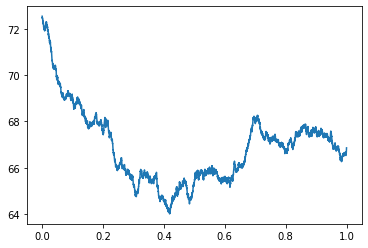

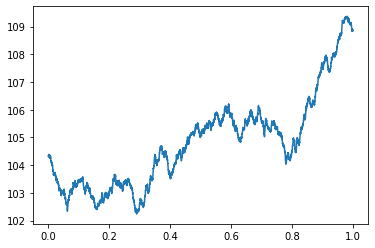

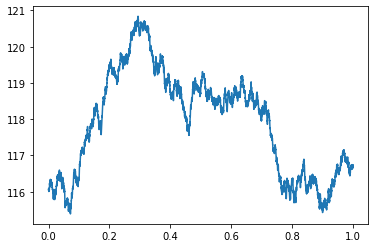

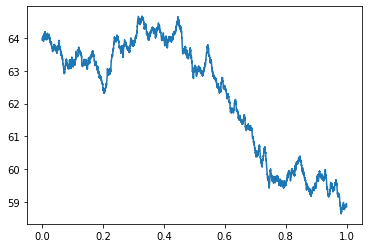

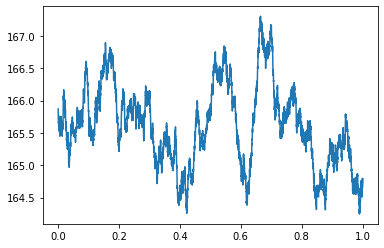

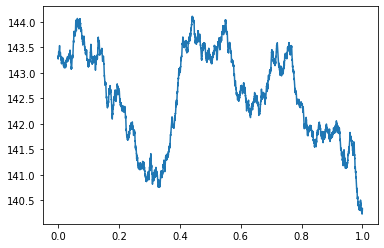

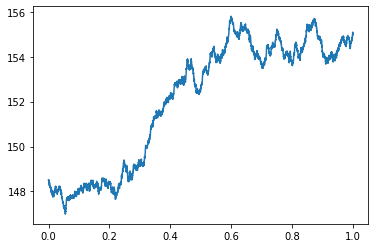

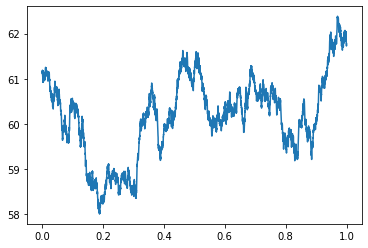

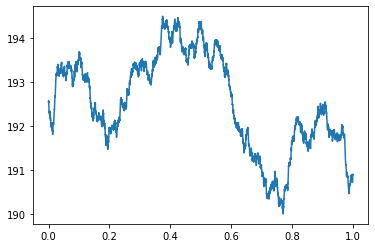

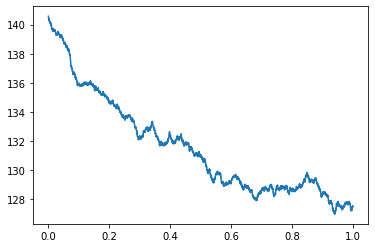

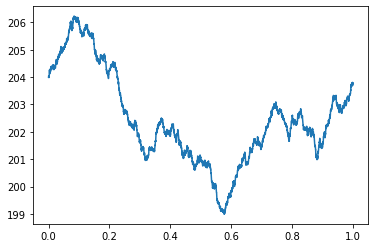

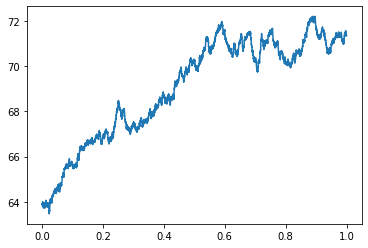

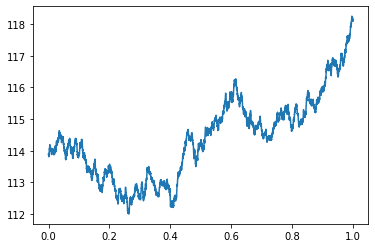

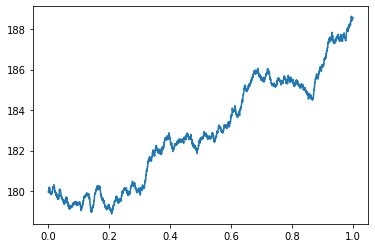

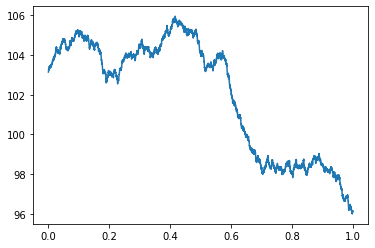

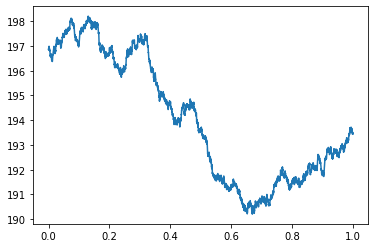

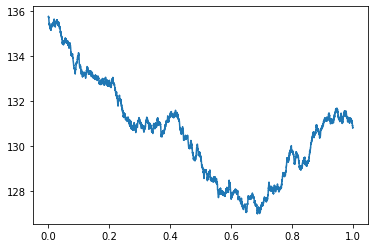

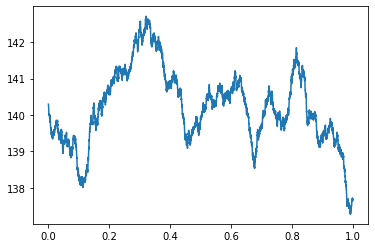

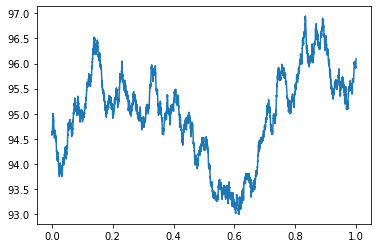

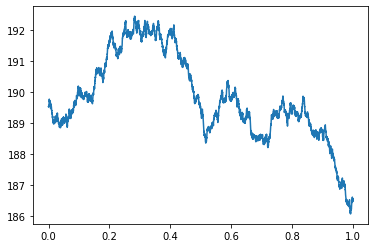

In [66]:
for i in range(1,np.shape(fbm20)[0]-80):
    plt.plot(np.linspace(0,1,int(2**13+1)),fbm20[i][4000:2**13+1+4000])
    plt.show()

In [68]:
np.savetxt('./fbm100_2_14_2_5.txt', fbm20[1:,4000:2**13+1+4000])
np.savetxt('./fbm100_2_14_2_5_hurstpool.txt', hurstpool[1:,4000:2**13+1+4000])

In [69]:
np.shape(fbm20[1:,4000:2**13+1+4000])

(100, 8193)

In [11]:
# np.shape(fbm20[1:,2000:2**13+1+2000])

In [12]:
# fbm20 = np.append(fbm20,fbmnp)

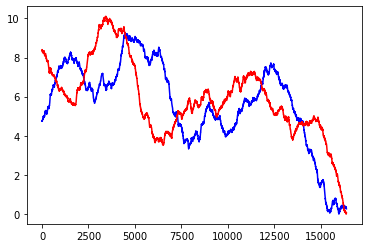

In [53]:
f = fbm.FBM(n=2**14, hurst=0.75, length=2**5, method='daviesharte')
a = f.fbm()
b = fbmMAT(0.75,2**14,2**5)
plt.plot(np.arange(2**14+1),a+abs(min(a)), color='blue')
plt.plot(np.arange(2**14+1),b+abs(min(b)), color='red')

ValueError: x and y must have same first dimension, but have shapes (8193,) and (1,)

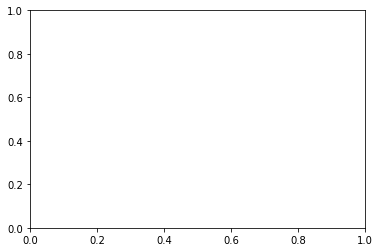

In [50]:
plt.plot(np.arange(2**13+1), b[0])

In [40]:
2**14

16384